In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline
from sklearn.neighbors import LocalOutlierFactor
from imblearn.over_sampling import SMOTE

In [3]:
df=pd.read_csv(r"C:\Users\Karan\Desktop\Test_ML\heart.csv")
print(df.head())
print(df.shape)
print(df.describe())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
(303, 14)
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.

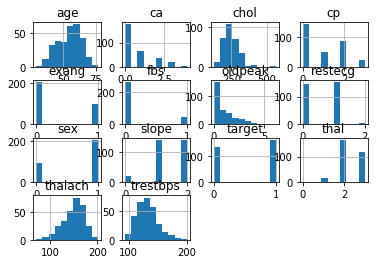

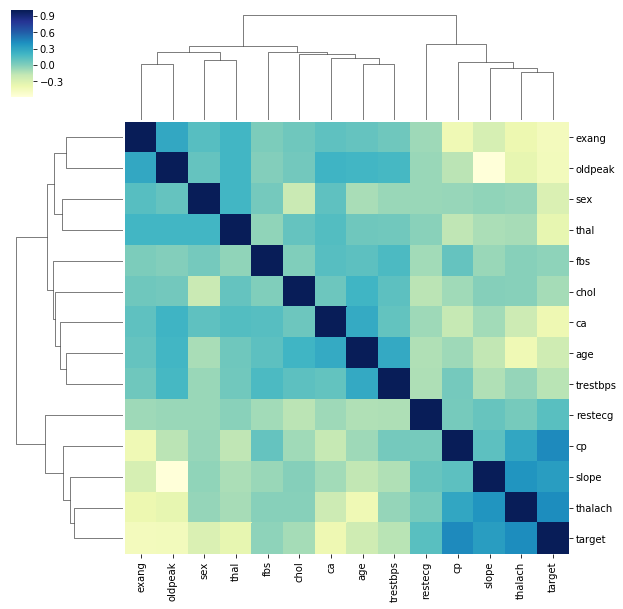

In [4]:
df.hist()
sns.clustermap(df.corr(), cmap='YlGnBu')

In [23]:
array=df.values
X=array[:,[2,4,5,6,7,10]]
Y=array[:,13]
validation_size = 0.1
seed = 7
X_train,X_validation,Y_train,Y_validation=model_selection.train_test_split(X,Y,test_size=validation_size,random_state=seed)

In [24]:
scoring='accuracy'
#Checking Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model nhmn
results = []
names = []
for name,model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.739550 (0.078524)
LDA: 0.743519 (0.098866)
KNN: 0.635847 (0.097508)
CART: 0.684656 (0.093406)
NB: 0.732275 (0.098816)
SVM: 0.558730 (0.072344)


In [25]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)
predictions = lr.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8709677419354839
[[10  4]
 [ 0 17]]
              precision    recall  f1-score   support

         0.0       1.00      0.71      0.83        14
         1.0       0.81      1.00      0.89        17

    accuracy                           0.87        31
   macro avg       0.90      0.86      0.86        31
weighted avg       0.90      0.87      0.87        31



In [26]:
svc = SVC(kernel='linear')
svc.fit(X_train, Y_train)
predictions = svc.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9032258064516129
[[11  3]
 [ 0 17]]
              precision    recall  f1-score   support

         0.0       1.00      0.79      0.88        14
         1.0       0.85      1.00      0.92        17

    accuracy                           0.90        31
   macro avg       0.93      0.89      0.90        31
weighted avg       0.92      0.90      0.90        31



In [27]:
nb = GaussianNB()
nb.fit(X_train, Y_train)
predictions = nb.predict(X_validation)
print('accuracy :',accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

accuracy : 0.8709677419354839
[[10  4]
 [ 0 17]]
              precision    recall  f1-score   support

         0.0       1.00      0.71      0.83        14
         1.0       0.81      1.00      0.89        17

    accuracy                           0.87        31
   macro avg       0.90      0.86      0.86        31
weighted avg       0.90      0.87      0.87        31



In [28]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train)
predictions = lda.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8709677419354839
[[10  4]
 [ 0 17]]
              precision    recall  f1-score   support

         0.0       1.00      0.71      0.83        14
         1.0       0.81      1.00      0.89        17

    accuracy                           0.87        31
   macro avg       0.90      0.86      0.86        31
weighted avg       0.90      0.87      0.87        31



In [7]:
fname="karan"
sname="risbud"
age=18
print("my name is",fname,sname,"and my age is",age)
print("my name is {} {} and my age is {}".format(fname,sname,age))

my name is karan risbud and my age is 18
my name is karan risbud and my age is 18


In [23]:
class Person():
    def __init__(self,name):
        self.name=name
    def give_name(self):
        return self.name
    def isemployee(self):
        print("False")
        
class Employee(Person):
    def __init__(self,name):
        self.name=name
        print("welcome back member")
    def isemployee(self):
        print("True")

x=Person("karan")
print(x.isemployee())

    
    
    

False
None
